# Gradient Descent Implementation

In [1]:
# from torch import *
# import numpy
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.tensor([[0.932, 1],[-0.1234,1]])

tensor([[ 0.9320,  1.0000],
        [-0.1234,  1.0000]])

In [3]:
n = 100

In [4]:
x = torch.ones(n,2)

In [5]:
x[:,0].uniform_(-1,1)
x[:5]

tensor([[ 0.2965,  1.0000],
        [-0.1259,  1.0000],
        [-0.9914,  1.0000],
        [ 0.5421,  1.0000],
        [ 0.4641,  1.0000]])

In [6]:
a = torch.tensor([3.,2.])
a

tensor([3., 2.])

In [7]:
y = x@a + torch.rand(n) # 100 data points & some random error

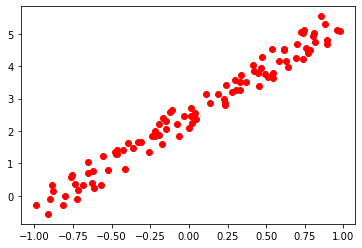

In [8]:
plt.plot(x[:,0],y,'ro')

## Loss Function
Mean squared error function is being used as the loss function.

In [9]:
def mse(y_hat, y):
    return ((y_hat - y)**2).mean() # returns the mean value of all the elements in the tensor

## PyTorch Implementation

Using their _torch.autograd_ functionality to calculate the gradient of the given tensor and hence update the paramaters.

In [10]:
a = torch.tensor([-1,1], dtype=torch.float, requires_grad=True)
a

tensor([-1.,  1.], requires_grad=True)

In [11]:
def update_torch(lr=1e-1):
    y_hat = x@a # matrix multiplication
    loss = mse(y_hat, y)
    print(f'loss: {loss}')
    loss.backward()
    with torch.no_grad():
        print(f'Gradient of paramaters: {a.grad}')
        a.sub_(lr * a.grad)
        a.grad.zero_()
    

In [12]:
for t in range(10): update_torch()

loss: 7.565099716186523
Gradient of paramaters: tensor([-2.5648, -3.3516])
loss: 5.924997329711914
Gradient of paramaters: tensor([-2.3731, -2.6568])
loss: 4.750115871429443
Gradient of paramaters: tensor([-2.1999, -2.1028])
loss: 3.887650728225708
Gradient of paramaters: tensor([-2.0429, -1.6613])
loss: 3.2381556034088135
Gradient of paramaters: tensor([-1.8998, -1.3096])
loss: 2.7364957332611084
Gradient of paramaters: tensor([-1.7690, -1.0295])
loss: 2.3396472930908203
Gradient of paramaters: tensor([-1.6490, -0.8068])
loss: 2.0188848972320557
Gradient of paramaters: tensor([-1.5386, -0.6297])
loss: 1.7547645568847656
Gradient of paramaters: tensor([-1.4368, -0.4891])
loss: 1.5339040756225586
Gradient of paramaters: tensor([-1.3426, -0.3776])


In [13]:
with torch.no_grad(): # remove the gradient value in the tensor to allow for plotting
    y_hat = x@a
    
y_hat

tensor([2.7029, 2.3305, 1.5674, 2.9194, 2.8506, 2.5386, 3.1216, 2.7349, 2.2151,
        2.0640, 2.9189, 2.3114, 2.9532, 1.8666, 2.4775, 3.0560, 2.8610, 2.1493,
        2.8107, 2.2318, 2.4131, 2.7370, 1.6513, 3.1542, 2.6054, 1.7360, 2.9829,
        2.8092, 1.7696, 2.6498, 2.2494, 2.9174, 2.6887, 2.4839, 3.3042, 3.2315,
        3.0924, 2.1196, 2.6499, 2.4596, 2.8907, 2.9826, 1.8637, 2.0317, 2.4519,
        2.5606, 2.8779, 3.0964, 2.2725, 2.6417, 2.4430, 2.2875, 2.8363, 2.7314,
        1.8356, 2.3442, 3.1584, 3.0538, 1.6607, 2.3831, 2.7668, 2.0301, 1.7997,
        1.7745, 1.9819, 2.0778, 1.7905, 2.6538, 2.3079, 2.0270, 3.1508, 3.2879,
        1.8082, 1.6666, 3.0041, 3.2180, 2.4548, 3.1306, 2.0166, 1.8879, 2.2927,
        1.8980, 1.7230, 3.0914, 2.2470, 2.8429, 2.2677, 3.0795, 2.9935, 3.1964,
        2.7080, 3.1081, 1.8965, 1.9506, 2.0919, 1.6345, 1.9377, 2.1656, 2.3721,
        3.2270])

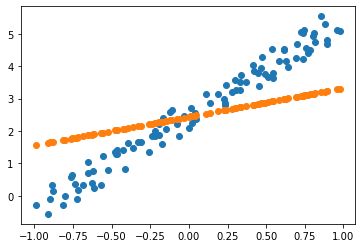

In [14]:
fig = plt.figure()
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)

In [15]:
for t in range(25): update_torch()

loss: 1.3469079732894897
Gradient of paramaters: tensor([-1.2554, -0.2893])
loss: 1.18703031539917
Gradient of paramaters: tensor([-1.1744, -0.2194])
loss: 1.0493056774139404
Gradient of paramaters: tensor([-1.0992, -0.1644])
loss: 0.9299847483634949
Gradient of paramaters: tensor([-1.0292, -0.1210])
loss: 0.8261645436286926
Gradient of paramaters: tensor([-0.9639, -0.0870])
loss: 0.7355433106422424
Gradient of paramaters: tensor([-0.9031, -0.0604])
loss: 0.6562564373016357
Gradient of paramaters: tensor([-0.8462, -0.0397])
loss: 0.5867663025856018
Gradient of paramaters: tensor([-0.7931, -0.0237])
loss: 0.5257851481437683
Gradient of paramaters: tensor([-0.7435, -0.0114])
loss: 0.4722215533256531
Gradient of paramaters: tensor([-0.6971, -0.0020])
loss: 0.42514142394065857
Gradient of paramaters: tensor([-0.6537,  0.0050])
loss: 0.3837394714355469
Gradient of paramaters: tensor([-0.6130,  0.0102])
loss: 0.34731805324554443
Gradient of paramaters: tensor([-0.5749,  0.0140])
loss: 0.3152

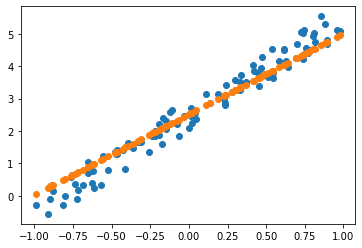

In [16]:
with torch.no_grad():
    y_hat = x@a

fig = plt.figure()
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat)

## Own Implementation of Gradient

Executed in order to better cement understanding around the inner workings of gradient descent.

In [95]:
def update(v,X,Y,lr=1e-1):
    '''
    Update the paramters using the partial derivates of the mean squared error
    '''
    der_a = 0.0
    der_b = 0.0
    l = len(X)
    for i in range(l):
        y_hat = X[i,0]*v[0] + X[i,1]*v[1] # approximation
        der_a += (-2*X[i,0]) * ((Y[i] - y_hat))
        der_b += -2*((Y[i] - y_hat))
        
    mean_a = der_a / float(l) # mean loss w.r.t a
    mean_b = der_b / float(l) # mean loss w.r.t b
    
    # UPDATE PARAMETERS
    v[0] -= mean_a * lr
    v[1] -= mean_b * lr

    return v # updated parameters

#### Testing

In [96]:
v = torch.tensor([-1, 1], dtype=torch.float)

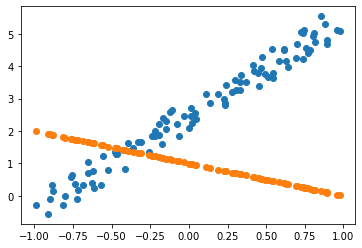

In [97]:
y_hat = x@v

plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat)

In [98]:
for t in range(50):
    v = update(v, x, y)
v

tensor([2.7330, 2.5012])

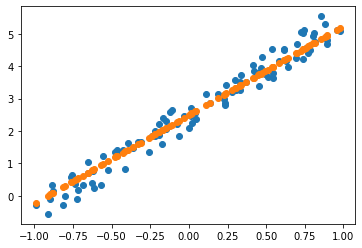

In [99]:
y_hat = x@v

plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat)